# Modelling
#### HomeAudioAccesory

In [175]:
#Importing all the libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#### LINEAR REGRESSION

In [176]:

# Load the CameraAccessoryWeeklyFinal.csv file which is generated by eda part.
HomeAudioWeekly=pd.read_csv('C:/Users/Dell/Downloads/HomeAudioWeeklyFinal.csv',na_values=['\\N'],low_memory=False)


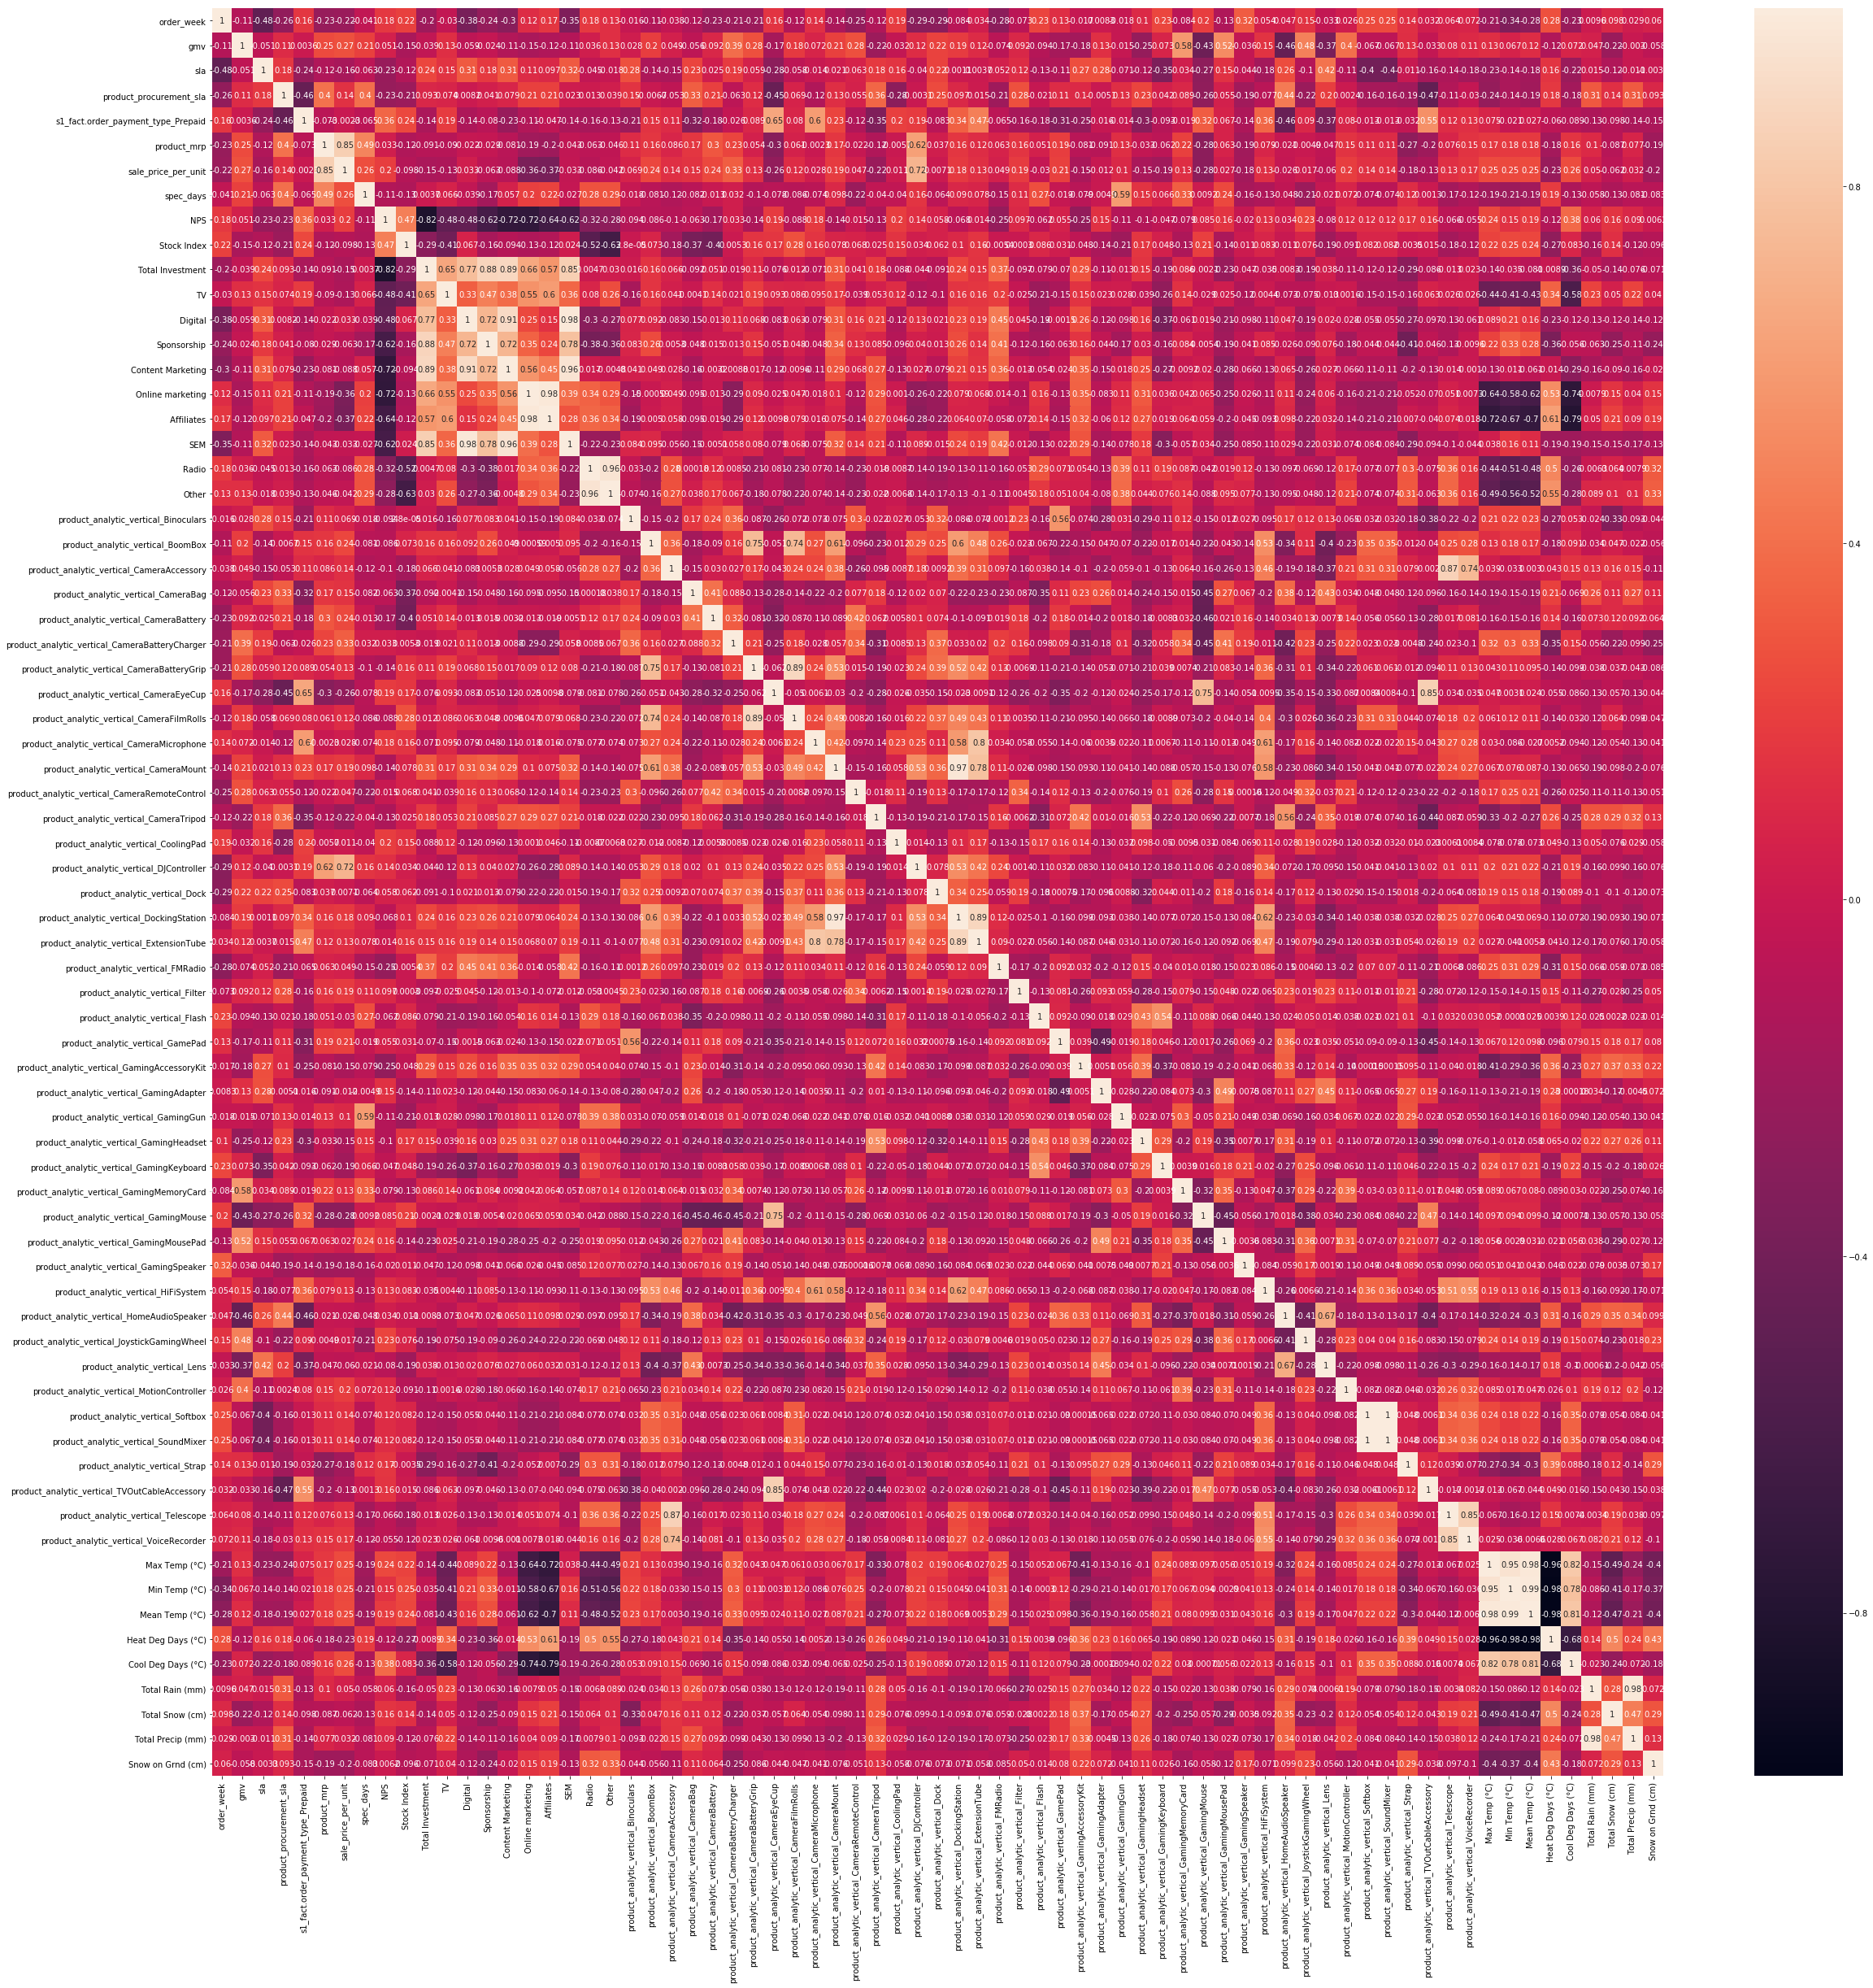

In [177]:
#Try to visulise it.
plt.figure(figsize=(40,40))
sns.heatmap(HomeAudioWeekly.corr(), annot=True)
plt.show()

In [178]:
#Using the above heat map, its difficult to remove multicollinearty
# so we will be doing VIF check and RFE
#checking basic info of dataframe
HomeAudioWeekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 71 columns):
order_week                                        53 non-null int64
gmv                                               46 non-null float64
sla                                               46 non-null float64
product_procurement_sla                           46 non-null float64
s1_fact.order_payment_type_Prepaid                46 non-null float64
product_mrp                                       46 non-null float64
sale_price_per_unit                               46 non-null float64
spec_days                                         46 non-null float64
NPS                                               46 non-null float64
Stock Index                                       46 non-null float64
Total Investment                                  46 non-null float64
TV                                                46 non-null float64
Digital                                           46 non-nu

In [179]:
# removing the Nan from final 
HomeAudioWeekly_f=HomeAudioWeekly[HomeAudioWeekly.gmv.isnull() ==False]

In [180]:
HomeAudioWeekly_f.shape

(46, 71)

In [181]:
# divide data into train and test
df_train,df_test = train_test_split(HomeAudioWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [182]:
# Standardise the data
scaler = StandardScaler()
scaler.fit(HomeAudioWeekly_f)

# divide data into train and test
df_train,df_test = train_test_split(HomeAudioWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [183]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

70

##### Using Grid Serach CV to tune feature hyperparameter

In [184]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    5.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [185]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065604,0.007446,0.0018,7.483155e-04,1,{'n_features_to_select': 1},-0.008130,-0.015371,0.306671,-0.304581,...,-1.299800,2.700084,1,0.114401,0.039194,0.062599,0.001852,0.383439,0.120297,0.136539
1,0.096805,0.006969,0.0022,3.999472e-04,2,{'n_features_to_select': 2},-0.010631,-0.018825,0.853156,-0.320340,...,-3.386533,7.299023,4,0.117129,0.043496,0.324530,0.261235,0.561780,0.261634,0.180283
2,0.083005,0.008649,0.0024,4.899208e-04,3,{'n_features_to_select': 3},0.448741,-0.693904,0.958663,-0.320340,...,-2.606152,5.624289,3,0.425734,0.236077,0.475352,0.261235,0.699177,0.419515,0.167373
3,0.062003,0.005404,0.0016,4.899598e-04,4,{'n_features_to_select': 4},0.625289,-0.486192,0.968139,-0.320340,...,-2.394364,5.401614,2,0.507232,0.581683,0.505594,0.261235,0.755957,0.522340,0.159238
4,0.056203,0.003600,0.0016,4.899208e-04,5,{'n_features_to_select': 5},0.257386,-1.312791,0.906158,-0.066657,...,-3.461325,7.055454,5,0.632008,0.793314,0.537298,0.552629,0.809873,0.665024,0.116169
5,0.059003,0.004000,0.0014,4.899793e-04,6,{'n_features_to_select': 6},0.392862,-1.540440,0.838151,0.198832,...,-4.079411,8.388077,6,0.665777,0.794307,0.598890,0.642787,0.864732,0.713299,0.099814
6,0.057203,0.005193,0.0014,4.899208e-04,7,{'n_features_to_select': 7},0.016326,-4.269912,0.800041,0.178898,...,-5.164805,9.029593,7,0.712351,0.868033,0.600682,0.647421,0.931366,0.751971,0.127312
7,0.052403,0.001020,0.0014,4.899403e-04,8,{'n_features_to_select': 8},-0.018304,-6.466308,0.794797,0.191004,...,-5.211123,8.154150,8,0.714138,0.883667,0.605535,0.647456,0.936856,0.757531,0.130514
8,0.053603,0.002728,0.0016,4.900182e-04,9,{'n_features_to_select': 9},-0.027135,-10.667267,0.784385,0.399006,...,-6.215634,8.716310,9,0.714227,0.900024,0.618000,0.671962,0.937510,0.768345,0.127105
9,0.053403,0.003827,0.0018,4.000902e-04,10,{'n_features_to_select': 10},-0.097736,-11.786952,0.819678,0.369782,...,-6.467165,8.829240,10,0.770873,0.922221,0.623707,0.679909,0.938686,0.787079,0.126243


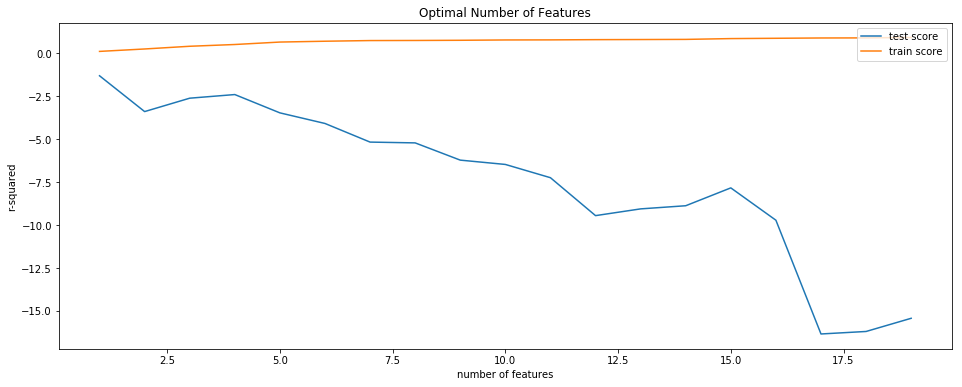

In [186]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [187]:
#11 seems optimal no of features 
print(df_train.shape)
print(df_test.shape)

(32, 70)
(14, 70)


In [188]:

# Running RFE with the output number of the variable equal to 11
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 11)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [189]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))



[('order_week', False, 56),
 ('sla', False, 49),
 ('product_procurement_sla', False, 23),
 ('s1_fact.order_payment_type_Prepaid', False, 13),
 ('product_mrp', False, 58),
 ('sale_price_per_unit', False, 57),
 ('spec_days', False, 17),
 ('NPS', False, 18),
 ('Stock Index', False, 34),
 ('Total Investment', False, 38),
 ('TV', False, 9),
 ('Digital', False, 20),
 ('Sponsorship', False, 39),
 ('Content Marketing', False, 37),
 ('Online marketing', False, 33),
 (' Affiliates', False, 44),
 ('SEM', False, 27),
 ('Radio', False, 36),
 ('Other', False, 25),
 ('product_analytic_vertical_Binoculars', True, 1),
 ('product_analytic_vertical_BoomBox', True, 1),
 ('product_analytic_vertical_CameraAccessory', True, 1),
 ('product_analytic_vertical_CameraBag', False, 7),
 ('product_analytic_vertical_CameraBattery', True, 1),
 ('product_analytic_vertical_CameraBatteryCharger', False, 4),
 ('product_analytic_vertical_CameraBatteryGrip', False, 21),
 ('product_analytic_vertical_CameraEyeCup', False, 29)

In [190]:
col = x_train.columns[rfe.support_]
col

Index(['product_analytic_vertical_Binoculars',
       'product_analytic_vertical_BoomBox',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingMemoryCard',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_MotionController'],
      dtype='object')

In [191]:
# Creating X_train dataframe with RFE selected variables
x_train_rfe = x_train[col]


In [192]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [193]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [194]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7.721
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.75e-05
Time:                        20:27:20   Log-Likelihood:                -462.16
No. Observations:                  32   AIC:                             948.3
Df Residuals:                      20   BIC:                             965.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [195]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,151.67
8,product_analytic_vertical_GamingHeadset,6.25
2,product_analytic_vertical_BoomBox,3.31
1,product_analytic_vertical_Binoculars,2.84
6,product_analytic_vertical_Filter,2.49
9,product_analytic_vertical_GamingMemoryCard,2.44
3,product_analytic_vertical_CameraAccessory,2.38
10,product_analytic_vertical_HiFiSystem,2.00
11,product_analytic_vertical_MotionController,1.97
5,product_analytic_vertical_ExtensionTube,1.85


###### Making a Function to check VIF since it will be used again and again

In [196]:
def checkVIF(dataframe):
    
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [197]:
#Model 2
#dropping product_analytic_vertical_HiFiSystem due to high P value
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_HiFiSystem"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     7.558
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.34e-05
Time:                        20:27:20   Log-Likelihood:                -464.27
No. Observations:                  32   AIC:                             950.5
Df Residuals:                      21   BIC:                             966.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [198]:
# Calculate the VIFs for the new model
checkVIF(x_train_md2)

,Features,VIF
0,const,151.56
8,product_analytic_vertical_GamingHeadset,6.25
1,product_analytic_vertical_Binoculars,2.84
2,product_analytic_vertical_BoomBox,2.83
6,product_analytic_vertical_Filter,2.49
9,product_analytic_vertical_GamingMemoryCard,2.40
10,product_analytic_vertical_MotionController,1.93
3,product_analytic_vertical_CameraAccessory,1.82
7,product_analytic_vertical_GamePad,1.75
4,product_analytic_vertical_CameraBattery,1.70


In [199]:
#Model 3
#dropping product_analytic_vertical_BoomBox due to high P value
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_BoomBox"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     7.687
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.86e-05
Time:                        20:27:21   Log-Likelihood:                -465.94
No. Observations:                  32   AIC:                             951.9
Df Residuals:                      22   BIC:                             966.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [200]:
# Calculate the VIFs for the new model
checkVIF(x_train_md3)

,Features,VIF
0,const,85.31
7,product_analytic_vertical_GamingHeadset,3.81
8,product_analytic_vertical_GamingMemoryCard,2.37
1,product_analytic_vertical_Binoculars,2.29
5,product_analytic_vertical_Filter,1.97
2,product_analytic_vertical_CameraAccessory,1.82
9,product_analytic_vertical_MotionController,1.75
6,product_analytic_vertical_GamePad,1.62
3,product_analytic_vertical_CameraBattery,1.39
4,product_analytic_vertical_ExtensionTube,1.20


In [201]:
#Model 4
#dropping product_analytic_vertical_HiFiSystem due to high P value
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_MotionController"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     8.436
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.65e-05
Time:                        20:27:21   Log-Likelihood:                -466.77
No. Observations:                  32   AIC:                             951.5
Df Residuals:                      23   BIC:                             964.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [202]:
# Calculate the VIFs for the new model
checkVIF(x_train_md4)

,Features,VIF
0,const,85.28
7,product_analytic_vertical_GamingHeadset,3.81
1,product_analytic_vertical_Binoculars,2.28
5,product_analytic_vertical_Filter,1.96
6,product_analytic_vertical_GamePad,1.62
8,product_analytic_vertical_GamingMemoryCard,1.60
2,product_analytic_vertical_CameraAccessory,1.53
3,product_analytic_vertical_CameraBattery,1.39
4,product_analytic_vertical_ExtensionTube,1.18


In [203]:
#Model 5
#dropping product_analytic_vertical_GamingMemoryCard due to high P value
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_GamingMemoryCard"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     8.282
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.80e-05
Time:                        20:27:21   Log-Likelihood:                -469.03
No. Observations:                  32   AIC:                             954.1
Df Residuals:                      24   BIC:                             965.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [204]:
checkVIF(x_train_md5)

,Features,VIF
0,const,59.81
7,product_analytic_vertical_GamingHeadset,2.99
1,product_analytic_vertical_Binoculars,2.22
5,product_analytic_vertical_Filter,1.76
2,product_analytic_vertical_CameraAccessory,1.52
6,product_analytic_vertical_GamePad,1.52
3,product_analytic_vertical_CameraBattery,1.30
4,product_analytic_vertical_ExtensionTube,1.09


In [205]:
#Model 6
#dropping product_analytic_vertical_ExtensionTube due to high P value
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_ExtensionTube"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     9.076
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.60e-05
Time:                        20:27:22   Log-Likelihood:                -470.18
No. Observations:                  32   AIC:                             954.4
Df Residuals:                      25   BIC:                             964.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [206]:
checkVIF(x_train_md6)

,Features,VIF
0,const,59.80
6,product_analytic_vertical_GamingHeadset,2.99
1,product_analytic_vertical_Binoculars,2.21
4,product_analytic_vertical_Filter,1.75
5,product_analytic_vertical_GamePad,1.52
2,product_analytic_vertical_CameraAccessory,1.43
3,product_analytic_vertical_CameraBattery,1.30


In [207]:
#Model 7
#dropping product_analytic_vertical_Binoculars due to high VIF value
x_train_md7 = x_train_md6.drop(["product_analytic_vertical_Binoculars"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     6.825
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000346
Time:                        20:27:22   Log-Likelihood:                -475.27
No. Observations:                  32   AIC:                             962.5
Df Residuals:                      26   BIC:                             971.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [208]:
checkVIF(x_train_md7)

,Features,VIF
0,const,46.15
5,product_analytic_vertical_GamingHeadset,1.94
3,product_analytic_vertical_Filter,1.65
1,product_analytic_vertical_CameraAccessory,1.37
2,product_analytic_vertical_CameraBattery,1.29
4,product_analytic_vertical_GamePad,1.15


#### Residual Analysis of the train data

In [209]:
y_train_gmv = lm.predict(x_train_lm)

Text(0.5, 0, 'Errors')

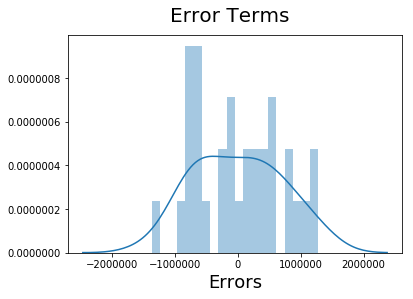

In [210]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_gmv), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                       # X-label

In [211]:
X_test2=X_test[['product_analytic_vertical_GamingHeadset',\
'product_analytic_vertical_Filter','product_analytic_vertical_GamePad','product_analytic_vertical_CameraAccessory',\
                'product_analytic_vertical_CameraBattery']]
X_test_lm = sm.add_constant(X_test2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.8664
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.543
Time:                        20:27:23   Log-Likelihood:                -216.06
No. Observations:                  14   AIC:                             444.1
Df Residuals:                       8   BIC:                             447.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Residual analysis clearly shows that the model is performing well on train data and not working fine in test dat

In [212]:
# Making predictions using the Seventh Model
y_pred = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

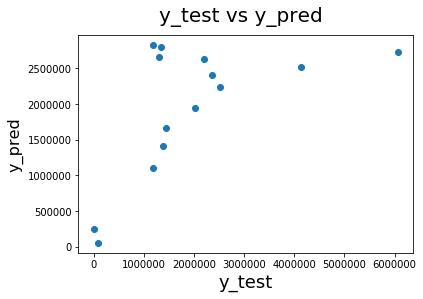

In [213]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [214]:
#RMSE calculation test data
math.sqrt(np.mean(np.square((y_pred-y_test))))

1219260.207134188

### Multiplicative Model

In [215]:
# taking log of the data
HomeAudioWeekly_log=np.log(HomeAudioWeekly_f.replace(0,0.0001))

In [216]:
#checking null values
HomeAudioWeekly_log.isnull

<bound method DataFrame.isnull of     order_week        gmv       sla  product_procurement_sla  \
0     3.332205  13.119914  1.870803                 0.927745   
1     3.367296  14.183020  1.781545                 0.860820   
2     3.401197  14.605362  1.862244                 0.933597   
3     3.433987  14.676667  1.839210                 0.908660   
4     3.583519  13.599408  1.807609                 0.913023   
5     3.610918  14.903940  1.796870                 0.999136   
6     3.637586  14.698446  1.878204                 0.908464   
7     3.663562  14.815718  1.832653                 1.029823   
8     3.688879  11.606288  1.850180                 0.742430   
9     3.713572  13.058546  1.935312                 0.928110   
10    3.737670  14.614963  1.823545                 1.072220   
11    3.761200  13.626556  1.888816                 0.908170   
12    3.784190  14.757737  1.886403                 0.887505   
13    3.806662  14.004196  1.868199                 1.026145   
14    

In [217]:
HomeAudioWeekly_log = HomeAudioWeekly_log.fillna(0)

In [218]:
HomeAudioWeekly_log

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,3.332205,13.119914,1.870803,0.927745,-1.547299,7.435520,7.016430,-9.210340,0.566039,3.636737,...,-9.210340,3.212187,2.730029,3.000720,-1.261131,0.868500,1.485385,-9.210340,1.485385,-9.210340
1,3.367296,14.183020,1.781545,0.860820,-1.101215,8.659421,8.269928,-1.196251,0.566039,3.636737,...,-9.210340,3.358638,2.866951,3.143434,-9.210340,1.645448,0.336472,-9.210340,0.336472,-9.210340
2,3.401197,14.605362,1.862244,0.933597,-1.238679,7.808530,7.405368,-9.210340,0.566039,3.636737,...,-9.210340,3.392829,2.809403,3.138100,-9.210340,1.621366,-0.105361,-9.210340,-0.105361,-9.210340
3,3.433987,14.676667,1.839210,0.908660,-1.228013,7.797647,7.463184,-9.210340,0.566039,3.636737,...,-9.210340,3.452630,2.862201,3.201391,-9.210340,1.882006,1.533277,-9.210340,1.533277,-9.210340
4,3.583519,13.599408,1.807609,0.913023,-1.302173,7.440846,6.974717,-9.210340,0.447362,3.602777,...,-9.210340,3.414991,2.928524,3.197039,-9.210340,1.865629,2.312535,-9.210340,2.312535,-9.210340
5,3.610918,14.903940,1.796870,0.999136,-1.362644,7.881598,7.434099,-9.210340,0.447362,3.602777,...,-3.274446,3.157000,2.701361,2.956991,0.246860,0.924259,-0.040822,-9.210340,-0.040822,-9.210340
6,3.637586,14.698446,1.878204,0.908464,-1.268992,7.864775,7.461906,-9.210340,0.447362,3.602777,...,-9.210340,3.208825,2.788093,3.022861,-9.210340,0.936093,-0.597837,-9.210340,-0.597837,-9.210340
7,3.663562,14.815718,1.832653,1.029823,-1.457386,8.014470,7.072377,-9.210340,0.447362,3.602777,...,-9.210340,3.258097,2.674149,2.995732,-9.210340,0.693147,-9.210340,-9.210340,-9.210340,-9.210340
8,3.688879,11.606288,1.850180,0.742430,-1.509125,7.202918,6.540913,-9.210340,0.359216,3.664388,...,-9.210340,2.980619,2.647946,2.874976,0.654926,0.500775,1.313724,-9.210340,1.313724,-9.210340
9,3.713572,13.058546,1.935312,0.928110,-1.636993,7.587464,7.267313,-9.210340,0.359216,3.664388,...,-9.210340,3.054001,2.484907,2.810607,0.322083,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340


In [219]:
# import Scaling the data
scaler = StandardScaler()
scaler.fit(HomeAudioWeekly_log)
# divide data into train and test
df_train,df_test = train_test_split(HomeAudioWeekly_log,train_size=0.7,test_size=0.3,random_state=True)

In [220]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

70

In [221]:
len(X_train.columns)
X_train.shape

(32, 70)

In [222]:
# doing cv on log data
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   10.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

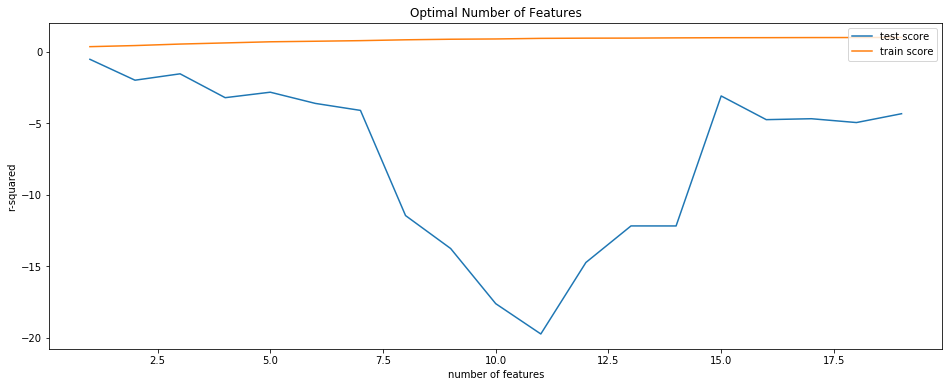

In [223]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [224]:
# Again 7 features seems good
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 7)             # running RFE
rfe = rfe.fit(x_train, y_train)
col = x_train.columns[rfe.support_]

In [225]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [226]:
col

Index(['product_procurement_sla', 'product_mrp', 'Total Investment',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_Lens'],
      dtype='object')

In [227]:
# Creating First multiplicative model
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     6.816
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000165
Time:                        20:27:41   Log-Likelihood:                -27.425
No. Observations:                  32   AIC:                             70.85
Df Residuals:                      24   BIC:                             82.58
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [228]:
# Calculate the VIFs for the new model
checkVIF(x_train_rfe)

,Features,VIF
0,const,1331.33
5,product_analytic_vertical_DockingStation,6.27
4,product_analytic_vertical_DJController,5.50
7,product_analytic_vertical_Lens,2.15
2,product_mrp,2.12
3,Total Investment,1.55
1,product_procurement_sla,1.46
6,product_analytic_vertical_GamingMousePad,1.21


In [229]:
#Multiplicative Model 2
# Removing product_analytic_vertical_DockingStation since it has high p and high VIF
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_DockingStation"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     7.681
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.46e-05
Time:                        20:27:43   Log-Likelihood:                -28.219
No. Observations:                  32   AIC:                             70.44
Df Residuals:                      25   BIC:                             80.70
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [230]:
checkVIF(x_train_md2)

,Features,VIF
0,const,1331.05
4,product_analytic_vertical_DJController,1.80
2,product_mrp,1.66
6,product_analytic_vertical_Lens,1.47
3,Total Investment,1.24
5,product_analytic_vertical_GamingMousePad,1.19
1,product_procurement_sla,1.17


In [231]:
#Multiplicative Model 3
# Removing product_analytic_vertical_DJController since it has high p and high VIF
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_DJController"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     9.315
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.53e-05
Time:                        20:27:43   Log-Likelihood:                -28.515
No. Observations:                  32   AIC:                             69.03
Df Residuals:                      26   BIC:                             77.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [232]:
checkVIF(x_train_md3)

,Features,VIF
0,const,679.70
2,product_mrp,1.27
3,Total Investment,1.22
5,product_analytic_vertical_Lens,1.18
1,product_procurement_sla,1.16
4,product_analytic_vertical_GamingMousePad,1.11


In [233]:
#Multiplicative Model 4
# Removing Total Investment  since it has high p 
x_train_md4 = x_train_md3.drop(["Total Investment"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     11.68
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.24e-05
Time:                        20:27:45   Log-Likelihood:                -28.872
No. Observations:                  32   AIC:                             67.74
Df Residuals:                      27   BIC:                             75.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [234]:
# Calculate the VIFs for the new model
checkVIF(x_train_md4)

,Features,VIF
0,const,650.78
2,product_mrp,1.17
1,product_procurement_sla,1.13
4,product_analytic_vertical_Lens,1.07
3,product_analytic_vertical_GamingMousePad,1.03


In [235]:
#Multiplicative Model 5
# Removing product_procurement_sla since it has high p 
x_train_md5 = x_train_md4.drop(["product_procurement_sla"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     15.73
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.46e-06
Time:                        20:27:47   Log-Likelihood:                -29.137
No. Observations:                  32   AIC:                             66.27
Df Residuals:                      28   BIC:                             72.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [236]:
# Calculate the VIFs for the new model
checkVIF(x_train_md5)

,Features,VIF
0,const,650.58
3,product_analytic_vertical_Lens,1.07
1,product_mrp,1.04
2,product_analytic_vertical_GamingMousePad,1.03


In [237]:
#Model & seems correct one.. its p values, vif and r square is accepatble

### Model Evaluation of Multiplicative Model

Text(0, 0.5, 'y_pred')

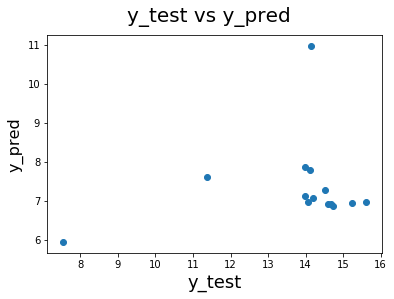

In [239]:
X_test2=X_test[['product_analytic_vertical_Lens','product_mrp','product_analytic_vertical_GamingMousePad']]
X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = lm.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  



In [240]:
#RMSE calculation test data
math.sqrt(np.mean(np.square((y_pred-y_test))))

6.708006970536776

In [241]:
np.exp(math.sqrt(np.mean(np.square((y_pred-y_test)))))

818.9368466289702

### Koyck Model

In [242]:
#making klag df from original df
HomeAudioWeekly_klag=HomeAudioWeekly

In [243]:
HomeAudioWeekly_klag['gmv_prev']=HomeAudioWeekly_klag.gmv.shift(1)

In [244]:
#Checking values
HomeAudioWeekly_klag[['gmv','gmv_prev']]
#GamingAccessoryWeekly_klag.fillna(0)

,gmv,gmv_prev
0,498777.000,NaN
1,1444133.000,498777.000
2,2203070.000,1444133.000
3,2365894.000,2203070.000
4,805653.000,2365894.000
5,2969607.000,805653.000
6,2417987.000,2969607.000
7,2718845.000,2417987.000
8,109786.000,2718845.000
9,469088.000,109786.000


In [245]:
HomeAudioWeekly_kf=HomeAudioWeekly_klag.dropna()

In [246]:
HomeAudioWeekly_kf.shape

(45, 72)

In [247]:
# scaling df
scaler = StandardScaler()
scaler.fit(HomeAudioWeekly_kf)
# divide data into train and test
df_train,df_test = train_test_split(HomeAudioWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [248]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

70

In [249]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    5.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

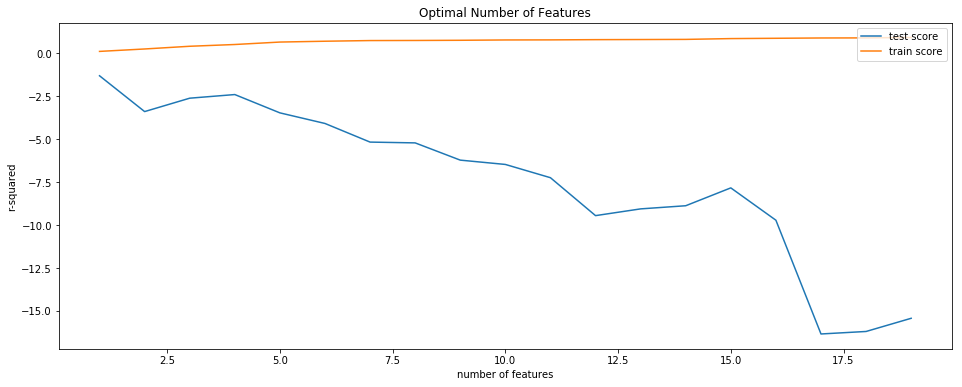

In [250]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [251]:
#10 seems optimal no of features 
print(df_train.shape)
print(df_test.shape)

(32, 70)
(14, 70)


##### Making first Koyck Model

In [258]:
# Running RFE with the optimum number of the variable equal to 08
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 8)             # running RFE
rfe = rfe.fit(x_train, y_train)
col = x_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     8.421
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.14e-05
Time:                        20:39:55   Log-Likelihood:                -480.79
No. Observations:                  32   AIC:                             977.6
Df Residuals:                      24   BIC:                             989.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [259]:
# Calculate the VIFs for the new model
checkVIF(x_train_rfe)

,Features,VIF
5,product_analytic_vertical_GamingMemoryCard,2.98
0,product_analytic_vertical_Binoculars,2.83
3,product_analytic_vertical_Filter,2.80
1,product_analytic_vertical_CameraAccessory,2.57
7,product_analytic_vertical_MotionController,2.14
4,product_analytic_vertical_GamingHeadset,1.71
6,product_analytic_vertical_HiFiSystem,1.67
2,product_analytic_vertical_ExtensionTube,1.29


In [260]:
#koyck Model 2
# Removing product_analytic_vertical_Filter since it has high p value
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_Filter"], axis = 1) 
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4.460
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00267
Time:                        20:42:16   Log-Likelihood:                -475.35
No. Observations:                  32   AIC:                             966.7
Df Residuals:                      24   BIC:                             978.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [261]:
# Calculate the VIFs for the new model
checkVIF(x_train_md2)

,Features,VIF
4,product_analytic_vertical_GamingMemoryCard,2.94
1,product_analytic_vertical_CameraAccessory,2.53
6,product_analytic_vertical_MotionController,2.13
0,product_analytic_vertical_Binoculars,1.94
5,product_analytic_vertical_HiFiSystem,1.64
3,product_analytic_vertical_GamingHeadset,1.61
2,product_analytic_vertical_ExtensionTube,1.26


In [262]:
#koyck Model 3
# Removing product_analytic_vertical_MotionController since it has high p
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_MotionController"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     5.019
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00169
Time:                        20:43:07   Log-Likelihood:                -476.04
No. Observations:                  32   AIC:                             966.1
Df Residuals:                      25   BIC:                             976.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [263]:
# Calculate the VIFs for the new model
checkVIF(x_train_md3)

,Features,VIF
1,product_analytic_vertical_CameraAccessory,2.15
0,product_analytic_vertical_Binoculars,1.92
4,product_analytic_vertical_GamingMemoryCard,1.69
5,product_analytic_vertical_HiFiSystem,1.64
3,product_analytic_vertical_GamingHeadset,1.61
2,product_analytic_vertical_ExtensionTube,1.23


In [264]:
#koyck Model 4
# Removing product_analytic_vertical_HiFiSystem since it has high p-value
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_HiFiSystem"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     5.530
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00134
Time:                        20:43:44   Log-Likelihood:                -477.09
No. Observations:                  32   AIC:                             966.2
Df Residuals:                      26   BIC:                             975.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [265]:
checkVIF(x_train_md4)

,Features,VIF
0,product_analytic_vertical_Binoculars,1.92
4,product_analytic_vertical_GamingMemoryCard,1.69
3,product_analytic_vertical_GamingHeadset,1.61
1,product_analytic_vertical_CameraAccessory,1.43
2,product_analytic_vertical_ExtensionTube,1.16


In [266]:
#koyck Model 5
# Removing product_analytic_vertical_CameraAccessory since it has high p value
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_CameraAccessory"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     6.576
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000788
Time:                        20:44:16   Log-Likelihood:                -477.80
No. Observations:                  32   AIC:                             965.6
Df Residuals:                      27   BIC:                             972.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [267]:
checkVIF(x_train_md5)

,Features,VIF
0,product_analytic_vertical_Binoculars,1.92
2,product_analytic_vertical_GamingHeadset,1.61
3,product_analytic_vertical_GamingMemoryCard,1.42
1,product_analytic_vertical_ExtensionTube,1.03


In [268]:
#koyck Model 6
# Removing product_analytic_vertical_ExtensionTube since it has high VIF
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_ExtensionTube"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     7.938
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000552
Time:                        20:44:45   Log-Likelihood:                -478.84
No. Observations:                  32   AIC:                             965.7
Df Residuals:                      28   BIC:                             971.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [269]:
checkVIF(x_train_md6)

,Features,VIF
0,product_analytic_vertical_Binoculars,1.90
1,product_analytic_vertical_GamingHeadset,1.60
2,product_analytic_vertical_GamingMemoryCard,1.41


### Koyck Model Evaluation

Text(0, 0.5, 'y_pred')

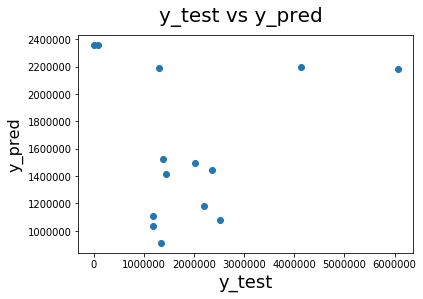

In [272]:
X_test2=X_test[['product_analytic_vertical_Binoculars','product_analytic_vertical_GamingHeadset','product_analytic_vertical_GamingMemoryCard']]
X_test_lm = sm.add_constant(X_test2)

X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = lm.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


In [273]:
#RMSE calculation test data
math.sqrt(np.mean(np.square(((y_pred-y_test)/10000))))

157.62229813639044

#### Distributed lag model

In [274]:
def constants(df):
    new_columns = ["{}_Int".format(variable) for variable in df.columns]
    return pd.DataFrame(np.ones_like(df.loc[:,:]), index=df.index, columns=new_columns)

def lag(df, n):
    new_columns = ["{}_Lag{:02d}".format(variable, n) for variable in df.columns]
    new_df = df.shift(n)
    new_df.columns = new_columns
    return new_df

In [275]:
HomeAudioWeekly_lag=lag(HomeAudioWeekly,1)

In [276]:
HomeAudioWeekly_lag.head()

,order_week_Lag01,gmv_Lag01,sla_Lag01,product_procurement_sla_Lag01,s1_fact.order_payment_type_Prepaid_Lag01,product_mrp_Lag01,sale_price_per_unit_Lag01,spec_days_Lag01,NPS_Lag01,Stock Index_Lag01,...,Max Temp (°C)_Lag01,Min Temp (°C)_Lag01,Mean Temp (°C)_Lag01,Heat Deg Days (°C)_Lag01,Cool Deg Days (°C)_Lag01,Total Rain (mm)_Lag01,Total Snow (cm)_Lag01,Total Precip (mm)_Lag01,Snow on Grnd (cm)_Lag01,gmv_prev_Lag01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.0,498777.0,6.493511,2.528799,0.212822,1695.139774,1114.799754,0.000000,1.761277,37.967742,...,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,NaN
2,29.0,1444133.0,5.939023,2.365099,0.332467,5764.199065,3904.669700,0.302326,1.761277,37.967742,...,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,498777.0
3,30.0,2203070.0,6.438170,2.543641,0.289767,2461.509966,1644.789249,0.000000,1.761277,37.967742,...,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0,1444133.0
4,31.0,2365894.0,6.291566,2.480996,0.292874,2434.865585,1742.687189,0.000000,1.761277,37.967742,...,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0,2203070.0


In [277]:
HomeAudioWeekly_lag = HomeAudioWeekly_lag.fillna(0)

In [278]:
HomeAudioWeekly_lag

,order_week_Lag01,gmv_Lag01,sla_Lag01,product_procurement_sla_Lag01,s1_fact.order_payment_type_Prepaid_Lag01,product_mrp_Lag01,sale_price_per_unit_Lag01,spec_days_Lag01,NPS_Lag01,Stock Index_Lag01,...,Max Temp (°C)_Lag01,Min Temp (°C)_Lag01,Mean Temp (°C)_Lag01,Heat Deg Days (°C)_Lag01,Cool Deg Days (°C)_Lag01,Total Rain (mm)_Lag01,Total Snow (cm)_Lag01,Total Precip (mm)_Lag01,Snow on Grnd (cm)_Lag01,gmv_prev_Lag01
0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
1,28.0,498777.000,6.493511,2.528799,0.212822,1695.139774,1114.799754,0.000000,1.761277,37.967742,...,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.000000,4.416667,0.000000,0.000
2,29.0,1444133.000,5.939023,2.365099,0.332467,5764.199065,3904.669700,0.302326,1.761277,37.967742,...,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.000000,1.400000,0.000000,498777.000
3,30.0,2203070.000,6.438170,2.543641,0.289767,2461.509966,1644.789249,0.000000,1.761277,37.967742,...,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.000000,0.900000,0.000000,1444133.000
4,31.0,2365894.000,6.291566,2.480996,0.292874,2434.865585,1742.687189,0.000000,1.761277,37.967742,...,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.000000,4.633333,0.000000,2203070.000
5,36.0,805653.000,6.095853,2.491845,0.271940,1704.191391,1069.254441,0.000000,1.564181,36.700000,...,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.000000,10.100000,0.000000,2365894.000
6,37.0,2969607.000,6.030743,2.715935,0.255983,2648.101503,1692.732172,0.000000,1.564181,36.700000,...,23.500000,14.900000,19.240000,1.280000,2.520000,0.960000,0.000000,0.960000,0.000000,805653.000
7,38.0,2417987.000,6.541744,2.480510,0.281115,2603.925226,1740.463018,0.000000,1.564181,36.700000,...,24.750000,16.250000,20.550000,0.000000,2.550000,0.550000,0.000000,0.550000,0.000000,2969607.000
8,39.0,2718845.000,6.250448,2.800571,0.232844,3024.407113,1178.946532,0.000000,1.564181,36.700000,...,26.000000,14.500000,20.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2417987.000
9,40.0,109786.000,6.360966,2.101034,0.221103,1343.344429,692.918982,0.000000,1.432206,39.032258,...,19.700000,14.125000,17.725000,1.925000,1.650000,3.720000,0.000000,3.720000,0.000000,2718845.000


In [279]:
# Scale the data
scaler = StandardScaler()
scaler.fit(HomeAudioWeekly_lag)
# divide data into train and test
df_train,df_test = train_test_split(HomeAudioWeekly_lag,train_size=0.7,test_size=0.3,random_state=True)

In [280]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv_Lag01')
X_train = df_train

y_test = df_test.pop('gmv_Lag01')
X_test = df_test

# number of features in X_train
len(X_train.columns)

71

In [281]:
# doing cv on lag data
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    5.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

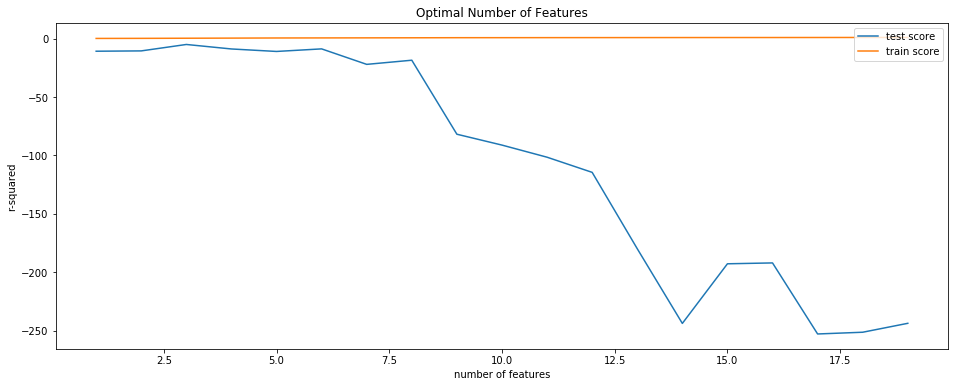

In [282]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [283]:
# Again 8 features seems good
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 8)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

In [284]:
x_train_rfe = X_train[col]

In [285]:
# Creating First lag model
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6.747
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.34e-05
Time:                        20:50:57   Log-Likelihood:                -549.59
No. Observations:                  37   AIC:                             1117.
Df Residuals:                      28   BIC:                             1132.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [286]:
checkVIF(x_train_rfe)

,Features,VIF
3,product_analytic_vertical_DJController_Lag01,4.08
0,const,3.80
4,product_analytic_vertical_ExtensionTube_Lag01,2.70
7,product_analytic_vertical_HiFiSystem_Lag01,2.47
6,product_analytic_vertical_GamingMousePad_Lag01,1.99
1,product_analytic_vertical_CameraBag_Lag01,1.68
2,product_analytic_vertical_CameraBatteryCharger...,1.55
8,product_analytic_vertical_VoiceRecorder_Lag01,1.38
5,product_analytic_vertical_GamingGun_Lag01,1.07


In [287]:
#Distributed Lag model 2
# Removing product_analytic_vertical_HiFiSystem_Lag01 since it has high p 
     
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_HiFiSystem_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     7.929
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.24e-05
Time:                        20:51:33   Log-Likelihood:                -549.68
No. Observations:                  37   AIC:                             1115.
Df Residuals:                      29   BIC:                             1128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [288]:
checkVIF(x_train_md2)

,Features,VIF
0,const,3.79
3,product_analytic_vertical_DJController_Lag01,2.85
4,product_analytic_vertical_ExtensionTube_Lag01,2.67
6,product_analytic_vertical_GamingMousePad_Lag01,1.90
1,product_analytic_vertical_CameraBag_Lag01,1.64
2,product_analytic_vertical_CameraBatteryCharger...,1.54
7,product_analytic_vertical_VoiceRecorder_Lag01,1.13
5,product_analytic_vertical_GamingGun_Lag01,1.07


In [289]:
#Lag Model 3
# Removing product_analytic_vertical_ExtensionTube_Lag01  since it has high p 
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_ExtensionTube_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     8.895
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.31e-05
Time:                        20:52:18   Log-Likelihood:                -550.56
No. Observations:                  37   AIC:                             1115.
Df Residuals:                      30   BIC:                             1126.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [290]:
checkVIF(x_train_md3)

,Features,VIF
0,const,3.76
5,product_analytic_vertical_GamingMousePad_Lag01,1.88
1,product_analytic_vertical_CameraBag_Lag01,1.60
2,product_analytic_vertical_CameraBatteryCharger...,1.54
3,product_analytic_vertical_DJController_Lag01,1.20
6,product_analytic_vertical_VoiceRecorder_Lag01,1.13
4,product_analytic_vertical_GamingGun_Lag01,1.07


In [291]:
#MLag Model 4
# Removing product_analytic_vertical_GamingGun_Lag01 since it has high p 
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_GamingGun_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     9.923
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.71e-06
Time:                        20:52:52   Log-Likelihood:                -551.79
No. Observations:                  37   AIC:                             1116.
Df Residuals:                      31   BIC:                             1125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [292]:
checkVIF(x_train_md4)

,Features,VIF
0,const,3.76
4,product_analytic_vertical_GamingMousePad_Lag01,1.80
1,product_analytic_vertical_CameraBag_Lag01,1.59
2,product_analytic_vertical_CameraBatteryCharger...,1.53
3,product_analytic_vertical_DJController_Lag01,1.20
5,product_analytic_vertical_VoiceRecorder_Lag01,1.13


In [293]:
#Lag Model 5
# Removing product_analytic_vertical_VoiceRecorder_Lag01 since it has high p 
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_VoiceRecorder_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     11.24
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.26e-06
Time:                        20:53:34   Log-Likelihood:                -553.23
No. Observations:                  37   AIC:                             1116.
Df Residuals:                      32   BIC:                             1125.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [294]:
checkVIF(x_train_md5)

,Features,VIF
0,const,3.70
4,product_analytic_vertical_GamingMousePad_Lag01,1.78
1,product_analytic_vertical_CameraBag_Lag01,1.58
2,product_analytic_vertical_CameraBatteryCharger...,1.53
3,product_analytic_vertical_DJController_Lag01,1.09


### Model Evaluation

Text(0, 0.5, 'y_pred')

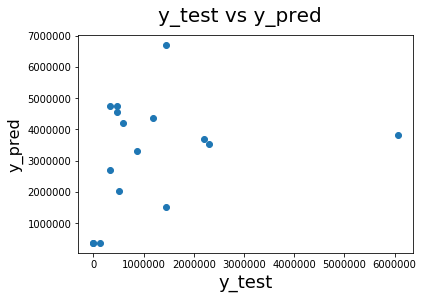

In [296]:
X_test2=X_test[['product_analytic_vertical_GamingMousePad_Lag01','product_analytic_vertical_CameraBag_Lag01',\
                'product_analytic_vertical_CameraBatteryCharger_Lag01','product_analytic_vertical_DJController_Lag01']]

X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = lm.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [297]:
#RMSE calculation test data
math.sqrt(np.mean(np.square(((y_pred-y_test)/10000))))

283.0235559052471